In [1]:
import torch
import torchvision as thv
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms as transforms

## MNIST DATASET

In [2]:
train = thv.datasets.MNIST(' .. / data ', download=True , train=True, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
val = thv.datasets.MNIST(' .. / data ', download=True , train=False, transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))]))
print(train.data.shape , len ( train.targets ))
#print(val)
train_loader = torch.utils.data.DataLoader(train, batch_size=128, shuffle = True)
test_loader = torch.utils.data.DataLoader(val, batch_size=128, shuffle = False)

Extracting  .. / data /MNIST/raw/train-images-idx3-ubyte.gz to  .. / data /MNIST/raw


Extracting  .. / data /MNIST/raw/train-labels-idx1-ubyte.gz to  .. / data /MNIST/raw


Extracting  .. / data /MNIST/raw/t10k-images-idx3-ubyte.gz to  .. / data /MNIST/raw


Extracting  .. / data /MNIST/raw/t10k-labels-idx1-ubyte.gz to  .. / data /MNIST/raw
Processing...


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /Users/distiller/project/conda/conda-bld/pytorch_1607370126481/work/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Done!
torch.Size([60000, 28, 28]) 60000





## CNN FOR MNIST

In [14]:
class ConNet(nn.Module):
    def __init__(self):
        super(ConNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(4 * 4 * 64, 1024)
        self.relu = nn.ReLU()

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.flatten(out)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.relu(out)
        return F.log_softmax(out)

In [15]:
model_1 = ConNet()
model_2 = ConNet()
model_3 = ConNet()
model_4 = ConNet()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()


In [16]:
from sklearn.metrics import f1_score, precision_score, recall_score
total_step = len(train_loader)
loss_list = [[],[],[],[]]
acc_list = [[],[],[],[]]
num_epochs = 10
Model = [model_1, model_2, model_3, model_4]
for j in range(4):
    optimizer = torch.optim.Adam(Model[j].parameters(), lr=0.0005)
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):
        # Run the forward pass
            model = Model[j]
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_list[j].append(loss.item())

            # Backprop and perform Adam optimisation
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Track the accuracy
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list[j].append(correct / total)

            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))
                print('F1: {}  Precision: {}  Recall: {}'.format(f1_score(labels, predicted, average = "weighted"),precision_score(labels, predicted, average = "weighted"),recall_score(labels, predicted, average = "weighted")))
            
            

/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [100/469], Loss: 0.5223, Accuracy: 85.16%
F1: 0.8516998201756548  Precision: 0.8639154790521978  Recall: 0.8515625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [200/469], Loss: 0.2572, Accuracy: 91.41%
F1: 0.9146214522133639  Precision: 0.9209133748196248  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [300/469], Loss: 0.2558, Accuracy: 91.41%
F1: 0.9140946570168652  Precision: 0.9186685863156451  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [400/469], Loss: 0.2058, Accuracy: 92.97%
F1: 0.929417100667613  Precision: 0.9331106240573153  Recall: 0.9296875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [100/469], Loss: 0.1605, Accuracy: 94.53%
F1: 0.9460214194537796  Precision: 0.9507533482142857  Recall: 0.9453125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [200/469], Loss: 0.1004, Accuracy: 96.88%
F1: 0.9686810714624015  Precision: 0.9705390963203463  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [300/469], Loss: 0.1600, Accuracy: 93.75%
F1: 0.9370912882504614  Precision: 0.9404188368055556  Recall: 0.9375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [400/469], Loss: 0.0587, Accuracy: 98.44%
F1: 0.984380080904888  Precision: 0.9855339972527473  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [100/469], Loss: 0.1101, Accuracy: 97.66%
F1: 0.9765720437510366  Precision: 0.9777935606060606  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [200/469], Loss: 0.0843, Accuracy: 98.44%
F1: 0.9841661587135725  Precision: 0.9854967948717949  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [300/469], Loss: 0.0386, Accuracy: 98.44%
F1: 0.984254079980417  Precision: 0.9854213169642857  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [400/469], Loss: 0.0717, Accuracy: 96.09%
F1: 0.9619136075744218  Precision: 0.9656328914141414  Recall: 0.9609375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [100/469], Loss: 0.1005, Accuracy: 97.66%
F1: 0.9766376852661939  Precision: 0.9785523504273504  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [200/469], Loss: 0.0651, Accuracy: 97.66%
F1: 0.9767440886331669  Precision: 0.979203869047619  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [300/469], Loss: 0.0800, Accuracy: 98.44%
F1: 0.9844406691690041  Precision: 0.9856770833333333  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [400/469], Loss: 0.1422, Accuracy: 97.66%
F1: 0.9764382949125596  Precision: 0.9769736842105263  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [100/469], Loss: 0.0066, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [200/469], Loss: 0.0601, Accuracy: 98.44%
F1: 0.9843270271395271  Precision: 0.9853665865384615  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [300/469], Loss: 0.0338, Accuracy: 99.22%
F1: 0.9921875  Precision: 0.9928977272727273  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [400/469], Loss: 0.0507, Accuracy: 98.44%
F1: 0.9843311711079944  Precision: 0.98486328125  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [100/469], Loss: 0.0243, Accuracy: 99.22%
F1: 0.9919232293868921  Precision: 0.9925426136363636  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [200/469], Loss: 0.0243, Accuracy: 99.22%
F1: 0.9922019009216589  Precision: 0.99267578125  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [300/469], Loss: 0.0160, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [400/469], Loss: 0.0219, Accuracy: 99.22%
F1: 0.992267084040747  Precision: 0.99296875  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [100/469], Loss: 0.0053, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [200/469], Loss: 0.0237, Accuracy: 99.22%
F1: 0.9919507575757576  Precision: 0.9926470588235294  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [300/469], Loss: 0.0455, Accuracy: 96.88%
F1: 0.9687835011621104  Precision: 0.9719854287868994  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [400/469], Loss: 0.0358, Accuracy: 99.22%
F1: 0.9922389657444005  Precision: 0.9928385416666666  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [100/469], Loss: 0.0322, Accuracy: 98.44%
F1: 0.9843539562289563  Precision: 0.9862351190476191  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [200/469], Loss: 0.0808, Accuracy: 96.88%
F1: 0.9687521762067042  Precision: 0.9715049342105264  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [300/469], Loss: 0.0899, Accuracy: 97.66%
F1: 0.9758656240273886  Precision: 0.9781125992063492  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [400/469], Loss: 0.1008, Accuracy: 96.09%
F1: 0.9603279924626241  Precision: 0.9637803819444444  Recall: 0.9609375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [100/469], Loss: 0.0527, Accuracy: 98.44%
F1: 0.98416911502849  Precision: 0.9860491071428571  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [200/469], Loss: 0.0159, Accuracy: 99.22%
F1: 0.9922826688815061  Precision: 0.9928977272727273  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [300/469], Loss: 0.0301, Accuracy: 99.22%
F1: 0.9921875  Precision: 0.99296875  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [400/469], Loss: 0.0182, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [100/469], Loss: 0.0743, Accuracy: 97.66%
F1: 0.9766599393186182  Precision: 0.9789751838235294  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [200/469], Loss: 0.0111, Accuracy: 99.22%
F1: 0.9921130952380952  Precision: 0.9926215277777778  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [300/469], Loss: 0.1792, Accuracy: 95.31%
F1: 0.9548646044876323  Precision: 0.962890625  Recall: 0.953125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [400/469], Loss: 0.0227, Accuracy: 99.22%
F1: 0.9922457298136645  Precision: 0.9928385416666666  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [100/469], Loss: 0.4026, Accuracy: 88.28%
F1: 0.882212608060005  Precision: 0.8903867616758242  Recall: 0.8828125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [200/469], Loss: 0.4106, Accuracy: 85.94%
F1: 0.8578319078251728  Precision: 0.8630481038569273  Recall: 0.859375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [300/469], Loss: 0.1732, Accuracy: 94.53%
F1: 0.9454833757581829  Precision: 0.9470486111111112  Recall: 0.9453125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [400/469], Loss: 0.1511, Accuracy: 94.53%
F1: 0.9456852532679739  Precision: 0.9533511321195144  Recall: 0.9453125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [100/469], Loss: 0.1731, Accuracy: 95.31%
F1: 0.9531177184114235  Precision: 0.9549696180555556  Recall: 0.953125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [200/469], Loss: 0.0537, Accuracy: 97.66%
F1: 0.976683959598853  Precision: 0.9786604739832536  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [300/469], Loss: 0.0367, Accuracy: 99.22%
F1: 0.992175925925926  Precision: 0.9927455357142857  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [400/469], Loss: 0.0929, Accuracy: 97.66%
F1: 0.9767425033729381  Precision: 0.9781901041666666  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [100/469], Loss: 0.0915, Accuracy: 98.44%
F1: 0.98434235423251  Precision: 0.985453869047619  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [200/469], Loss: 0.0803, Accuracy: 97.66%
F1: 0.9764773965141612  Precision: 0.9777715773809523  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [300/469], Loss: 0.0869, Accuracy: 96.88%
F1: 0.9682326376141605  Precision: 0.9708139115021008  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [400/469], Loss: 0.0697, Accuracy: 96.88%
F1: 0.9681499574731866  Precision: 0.9712389823717948  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [100/469], Loss: 0.0982, Accuracy: 96.88%
F1: 0.9689194858978074  Precision: 0.9705946180555556  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [200/469], Loss: 0.0870, Accuracy: 96.09%
F1: 0.9613798384851017  Precision: 0.9631009615384616  Recall: 0.9609375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [300/469], Loss: 0.1399, Accuracy: 98.44%
F1: 0.984323747756103  Precision: 0.9855468749999999  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [400/469], Loss: 0.0366, Accuracy: 98.44%
F1: 0.984375  Precision: 0.98515625  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [100/469], Loss: 0.0485, Accuracy: 98.44%
F1: 0.9843992486915044  Precision: 0.9857362689393939  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [200/469], Loss: 0.0272, Accuracy: 99.22%
F1: 0.9921623389694042  Precision: 0.9927455357142857  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [300/469], Loss: 0.1080, Accuracy: 98.44%
F1: 0.9841163003663003  Precision: 0.9856861888111889  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [400/469], Loss: 0.0827, Accuracy: 99.22%
F1: 0.9921798631476051  Precision: 0.9926470588235294  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [100/469], Loss: 0.0380, Accuracy: 98.44%
F1: 0.9843967038396386  Precision: 0.9856270032051282  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [200/469], Loss: 0.0408, Accuracy: 97.66%
F1: 0.9766442076798845  Precision: 0.9778145032051282  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [300/469], Loss: 0.1151, Accuracy: 96.88%
F1: 0.9686762379777085  Precision: 0.9711963383838385  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [400/469], Loss: 0.0520, Accuracy: 98.44%
F1: 0.9844411057692308  Precision: 0.986092032967033  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [100/469], Loss: 0.0230, Accuracy: 99.22%
F1: 0.9924310064935065  Precision: 0.9934895833333334  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [200/469], Loss: 0.0832, Accuracy: 97.66%
F1: 0.976514896953405  Precision: 0.97802734375  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [300/469], Loss: 0.0498, Accuracy: 97.66%
F1: 0.9763164842549923  Precision: 0.9777610085227273  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [400/469], Loss: 0.0188, Accuracy: 99.22%
F1: 0.9924242424242424  Precision: 0.9934895833333334  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [100/469], Loss: 0.0394, Accuracy: 99.22%
F1: 0.9921616521918941  Precision: 0.992578125  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [200/469], Loss: 0.0200, Accuracy: 99.22%
F1: 0.9921130952380952  Precision: 0.9926215277777778  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [300/469], Loss: 0.0275, Accuracy: 99.22%
F1: 0.992100279106858  Precision: 0.9926470588235294  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [400/469], Loss: 0.0119, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [100/469], Loss: 0.0103, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [200/469], Loss: 0.0423, Accuracy: 99.22%
F1: 0.992107915959253  Precision: 0.99267578125  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [300/469], Loss: 0.0862, Accuracy: 96.88%
F1: 0.9685418531753788  Precision: 0.9704790900735294  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [400/469], Loss: 0.0312, Accuracy: 98.44%
F1: 0.9841416094973969  Precision: 0.98525390625  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [100/469], Loss: 0.0267, Accuracy: 99.22%
F1: 0.9922312675070029  Precision: 0.9930555555555556  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [200/469], Loss: 0.0334, Accuracy: 98.44%
F1: 0.984375  Precision: 0.9850852272727273  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [300/469], Loss: 0.0693, Accuracy: 98.44%
F1: 0.9844322560895703  Precision: 0.9858010912698413  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [400/469], Loss: 0.0213, Accuracy: 99.22%
F1: 0.9921436711079944  Precision: 0.99267578125  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [100/469], Loss: 1.1385, Accuracy: 78.91%
F1: 0.7607426359501653  Precision: 0.7461647847081645  Recall: 0.7890625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [200/469], Loss: 0.9861, Accuracy: 83.59%
F1: 0.8000760898114728  Precision: 0.7768432311246868  Recall: 0.8359375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [300/469], Loss: 0.6424, Accuracy: 89.06%
F1: 0.8604733250430329  Precision: 0.8368558114035087  Recall: 0.890625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [400/469], Loss: 1.0066, Accuracy: 85.16%
F1: 0.8019622405806617  Precision: 0.7707112746854594  Recall: 0.8515625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [100/469], Loss: 1.1338, Accuracy: 84.38%
F1: 0.7860013187185444  Precision: 0.7434084642379679  Recall: 0.84375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [200/469], Loss: 0.7334, Accuracy: 88.28%
F1: 0.8460095646121352  Precision: 0.8160191556044037  Recall: 0.8828125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [300/469], Loss: 0.7250, Accuracy: 89.06%
F1: 0.8584549753289473  Precision: 0.8362966753936423  Recall: 0.890625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [400/469], Loss: 0.5225, Accuracy: 90.62%
F1: 0.8770915032679739  Precision: 0.8530551320025004  Recall: 0.90625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [100/469], Loss: 0.7932, Accuracy: 87.50%
F1: 0.8411263577279202  Precision: 0.8235164141414141  Recall: 0.875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [200/469], Loss: 0.8495, Accuracy: 87.50%
F1: 0.8288972591191298  Precision: 0.7977627840909092  Recall: 0.875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [300/469], Loss: 1.0134, Accuracy: 85.16%
F1: 0.7947585715648375  Precision: 0.7519491465384461  Recall: 0.8515625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [400/469], Loss: 0.3085, Accuracy: 96.09%
F1: 0.9429598721590909  Precision: 0.9276194852941176  Recall: 0.9609375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [100/469], Loss: 0.6594, Accuracy: 90.62%
F1: 0.8690971061720143  Precision: 0.8396577380952381  Recall: 0.90625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [200/469], Loss: 0.6846, Accuracy: 89.06%
F1: 0.8516886603549645  Precision: 0.8206466215510033  Recall: 0.890625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [300/469], Loss: 0.9250, Accuracy: 86.72%
F1: 0.8205416807527609  Precision: 0.7898977299253035  Recall: 0.8671875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [400/469], Loss: 0.8896, Accuracy: 86.72%
F1: 0.8160588794429255  Precision: 0.7753205128205128  Recall: 0.8671875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [100/469], Loss: 0.5268, Accuracy: 91.41%
F1: 0.885481557531884  Precision: 0.8662636408730158  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [200/469], Loss: 0.7773, Accuracy: 89.06%
F1: 0.8457406957458357  Precision: 0.8090300429382279  Recall: 0.890625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [300/469], Loss: 0.5734, Accuracy: 91.41%
F1: 0.8833090475211703  Precision: 0.8605095603946706  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [400/469], Loss: 0.6355, Accuracy: 91.41%
F1: 0.8752386486627022  Precision: 0.8431368517801857  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [100/469], Loss: 0.7186, Accuracy: 88.28%
F1: 0.8463438361281432  Precision: 0.8216827876984126  Recall: 0.8828125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [200/469], Loss: 0.7122, Accuracy: 89.84%
F1: 0.8584463082107843  Precision: 0.8290309608155003  Recall: 0.8984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [300/469], Loss: 0.8482, Accuracy: 87.50%
F1: 0.8278318739935587  Precision: 0.790520671583851  Recall: 0.875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [400/469], Loss: 0.5124, Accuracy: 92.97%
F1: 0.9012979825361229  Precision: 0.877569122557815  Recall: 0.9296875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [100/469], Loss: 0.9694, Accuracy: 85.94%
F1: 0.8030332659238909  Precision: 0.7617793186439785  Recall: 0.859375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [200/469], Loss: 0.6228, Accuracy: 90.62%
F1: 0.8758879362064098  Precision: 0.8527744391025641  Recall: 0.90625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [300/469], Loss: 0.4260, Accuracy: 93.75%
F1: 0.9121845757492005  Precision: 0.8910948374176175  Recall: 0.9375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [400/469], Loss: 0.7818, Accuracy: 88.28%
F1: 0.8356714271719661  Precision: 0.7983397678710178  Recall: 0.8828125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [100/469], Loss: 1.0592, Accuracy: 84.38%
F1: 0.7853556351297675  Precision: 0.7446009132819795  Recall: 0.84375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [200/469], Loss: 0.7787, Accuracy: 89.06%
F1: 0.8440852986520962  Precision: 0.8090008624188311  Recall: 0.890625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [300/469], Loss: 0.8401, Accuracy: 87.50%
F1: 0.8300400212532565  Precision: 0.7974620387016986  Recall: 0.875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [400/469], Loss: 0.6021, Accuracy: 91.41%
F1: 0.8785963743204791  Precision: 0.8479324494949495  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [100/469], Loss: 0.6133, Accuracy: 91.41%
F1: 0.8784409462393681  Precision: 0.8518446996397243  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [200/469], Loss: 1.0960, Accuracy: 84.38%
F1: 0.7872846554487181  Precision: 0.7516339869281046  Recall: 0.84375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [300/469], Loss: 0.5837, Accuracy: 90.62%
F1: 0.8743095930232558  Precision: 0.8525686553030303  Recall: 0.90625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [400/469], Loss: 0.5637, Accuracy: 91.41%
F1: 0.8831957778213166  Precision: 0.8616461530264279  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [100/469], Loss: 0.7396, Accuracy: 89.84%
F1: 0.8549480575847763  Precision: 0.8220207022311213  Recall: 0.8984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [200/469], Loss: 0.7945, Accuracy: 88.28%
F1: 0.8433605495426149  Precision: 0.8148956078643578  Recall: 0.8828125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [300/469], Loss: 0.5943, Accuracy: 90.62%
F1: 0.8711373745341136  Precision: 0.842879126082251  Recall: 0.90625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [400/469], Loss: 0.5609, Accuracy: 91.41%
F1: 0.8788895536193422  Precision: 0.8505173754197193  Recall: 0.9140625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [100/469], Loss: 0.5050, Accuracy: 84.38%
F1: 0.8491225686587812  Precision: 0.8663390071937866  Recall: 0.84375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [200/469], Loss: 0.2837, Accuracy: 92.19%
F1: 0.9223649652309193  Precision: 0.9265625  Recall: 0.921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [300/469], Loss: 0.2758, Accuracy: 94.53%
F1: 0.9464749716411609  Precision: 0.9554563492063491  Recall: 0.9453125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [400/469], Loss: 0.1453, Accuracy: 93.75%
F1: 0.9380456356536699  Precision: 0.9430094211344211  Recall: 0.9375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [100/469], Loss: 0.1465, Accuracy: 96.88%
F1: 0.9690027131433381  Precision: 0.9716134049773756  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [200/469], Loss: 0.0759, Accuracy: 97.66%
F1: 0.9767365645154419  Precision: 0.9787326388888888  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [300/469], Loss: 0.0434, Accuracy: 99.22%
F1: 0.9921875  Precision: 0.9926215277777778  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [2/10], Step [400/469], Loss: 0.0866, Accuracy: 97.66%
F1: 0.9766138136288999  Precision: 0.9777610085227273  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [100/469], Loss: 0.0746, Accuracy: 97.66%
F1: 0.9764016906939462  Precision: 0.9779438405797101  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [200/469], Loss: 0.0315, Accuracy: 99.22%
F1: 0.9921436711079944  Precision: 0.99267578125  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [300/469], Loss: 0.0954, Accuracy: 96.88%
F1: 0.9683856089860273  Precision: 0.9714843750000001  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [3/10], Step [400/469], Loss: 0.1000, Accuracy: 96.88%
F1: 0.9685827044633644  Precision: 0.971875  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [100/469], Loss: 0.0671, Accuracy: 97.66%
F1: 0.9766909584980237  Precision: 0.9781400240384616  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [200/469], Loss: 0.0733, Accuracy: 97.66%
F1: 0.9760915678995613  Precision: 0.9786290640782829  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [300/469], Loss: 0.1048, Accuracy: 97.66%
F1: 0.9766062675070027  Precision: 0.977890114379085  Recall: 0.9765625


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [4/10], Step [400/469], Loss: 0.1245, Accuracy: 96.88%
F1: 0.9685741120664461  Precision: 0.971781994047619  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [100/469], Loss: 0.0321, Accuracy: 99.22%
F1: 0.9921875  Precision: 0.9927884615384616  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [200/469], Loss: 0.0350, Accuracy: 99.22%
F1: 0.992199074074074  Precision: 0.9927884615384616  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [300/469], Loss: 0.0260, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [5/10], Step [400/469], Loss: 0.0568, Accuracy: 98.44%
F1: 0.9844676496077358  Precision: 0.9857954545454546  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [100/469], Loss: 0.0587, Accuracy: 98.44%
F1: 0.9844256756756757  Precision: 0.9849759615384616  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [200/469], Loss: 0.1911, Accuracy: 96.88%
F1: 0.9681517556517557  Precision: 0.9702271533613446  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [300/469], Loss: 0.0171, Accuracy: 99.22%
F1: 0.9922484161793372  Precision: 0.99296875  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [6/10], Step [400/469], Loss: 0.0250, Accuracy: 99.22%
F1: 0.9920874822190612  Precision: 0.9925986842105263  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [100/469], Loss: 0.0229, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [200/469], Loss: 0.0685, Accuracy: 98.44%
F1: 0.9843226943971519  Precision: 0.9855143229166666  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [300/469], Loss: 0.0401, Accuracy: 98.44%
F1: 0.9840689804147466  Precision: 0.9853515625  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [7/10], Step [400/469], Loss: 0.0121, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [100/469], Loss: 0.0237, Accuracy: 98.44%
F1: 0.9841918370839394  Precision: 0.9853515625  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [200/469], Loss: 0.0088, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [300/469], Loss: 0.1054, Accuracy: 96.88%
F1: 0.9687142448512586  Precision: 0.9701822916666666  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [8/10], Step [400/469], Loss: 0.0932, Accuracy: 95.31%
F1: 0.9531190655554214  Precision: 0.9549684758771929  Recall: 0.953125


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [100/469], Loss: 0.0339, Accuracy: 98.44%
F1: 0.984314024390244  Precision: 0.9854572510822511  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [200/469], Loss: 0.0305, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [300/469], Loss: 0.0145, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [9/10], Step [400/469], Loss: 0.0154, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [100/469], Loss: 0.0078, Accuracy: 100.00%
F1: 1.0  Precision: 1.0  Recall: 1.0


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [200/469], Loss: 0.0361, Accuracy: 99.22%
F1: 0.9922038270637409  Precision: 0.9927083333333333  Recall: 0.9921875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [300/469], Loss: 0.0434, Accuracy: 96.88%
F1: 0.9690835307079919  Precision: 0.9735677083333334  Recall: 0.96875


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [10/10], Step [400/469], Loss: 0.0421, Accuracy: 98.44%
F1: 0.9844700811359026  Precision: 0.9852430555555556  Recall: 0.984375


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


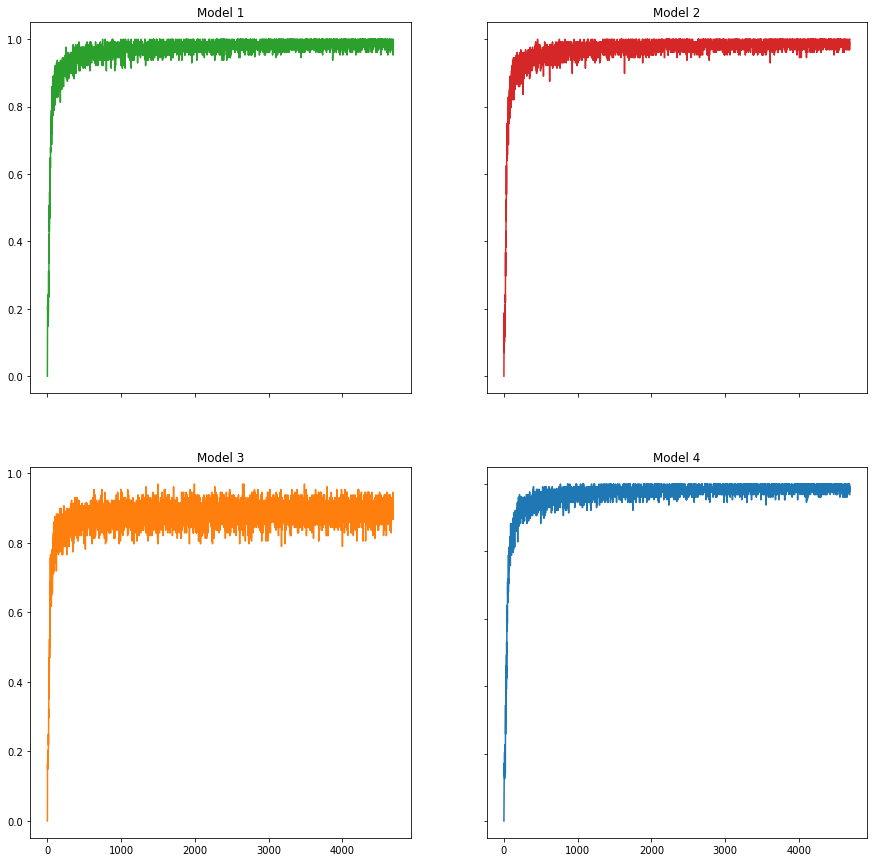

In [27]:
import numpy as np
import matplotlib.pyplot as plt


fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))
ax1.plot(list(range(len(acc_list[0]))), acc_list[0], 'tab:green')
ax1.set_title('Model 1')
ax2.plot(list(range(len(acc_list[1]))), acc_list[1], 'tab:red')
ax2.set_title('Model 2')
ax3.plot(list(range(len(acc_list[2]))), acc_list[2], 'tab:orange')
ax3.set_title('Model 3')
ax4.plot(list(range(len(acc_list[3]))), acc_list[3], 'tab:blue')
ax4.set_title('Model 4')
#plt.legend()
#plt.show()

for ax in fig.get_axes():
    ax.label_outer()

#print('Model_1: ', acc_list[0])
#print('Model_2: ', acc_list[1])
#print('Model_3: ', acc_list[2])
#print('Model_4: ', acc_list[3])

# Model 1: Our Base Model for The Test Data MNIST

In [28]:
test_loss1 = []
test_accuracy1 = []
with torch.no_grad():
    for X, y in test_loader:
        pred = model_1(X)
        loss = criterion(pred, y)
        loss_value = loss.item()
        
        y_pred = torch.argmax(pred.data,1)
        correct = (y == y_pred).sum().item()/len(y_pred)
        test_loss1.append(loss_value)
        test_accuracy1.append(correct)
        print("Test Loss = {}: Accuracy = {}".format(loss_value,correct))


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test Loss = 0.03942131623625755: Accuracy = 0.984375
Test Loss = 0.022892815992236137: Accuracy = 0.9921875
Test Loss = 0.06460095942020416: Accuracy = 0.9765625
Test Loss = 0.09909871965646744: Accuracy = 0.984375
Test Loss = 0.07380831986665726: Accuracy = 0.9765625
Test Loss = 0.06343870609998703: Accuracy = 0.9765625
Test Loss = 0.050726741552352905: Accuracy = 0.984375
Test Loss = 0.10961128771305084: Accuracy = 0.96875
Test Loss = 0.08474668860435486: Accuracy = 0.9765625
Test Loss = 0.16257737576961517: Accuracy = 0.9375
Test Loss = 0.08244489878416061: Accuracy = 0.9765625
Test Loss = 0.027924012392759323: Accuracy = 1.0
Test Loss = 0.036707546561956406: Accuracy = 0.9921875
Test Loss = 0.07895602285861969: Accuracy = 0.953125
Test Loss = 0.05400710552930832: Accuracy = 0.9765625
Test Loss = 0.07856814563274384: Accuracy = 0.9765625
Test Loss = 0.1379712074995041: Accuracy = 0.953125
Test Loss = 0.04761459678411484: Accuracy = 0.984375
Test Loss = 0.04490195959806442: Accuracy 

# Model 2: Adding Non-Random Noise to The Test Data MNIST

In [44]:
# Adding one crack to the camera: Showing with Model 2

test_loss2 = []
test_accuracy2 = []
def crack_noise():
    with torch.no_grad():
        for data in test_loader:
            img, y = data[0], data[1]
            cracked_noise = img.numpy()
            
            cracked_noise[:,:,10,:] = 0 
            cracked_noise[:,:,11,:] = 0
            cracked_img = torch.tensor(cracked_noise)
            pred = model_2(cracked_img)
            loss = criterion(pred, y)
            loss_value = loss.item()
        
            y_pred = torch.argmax(pred.data,1)
            correct = (y == y_pred).sum().item()/len(y_pred)
            test_loss2.append(loss_value)
            test_accuracy2.append(correct)
            print("Test Loss = {}: Accuracy = {}".format(loss_value,correct))

crack_noise()


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test Loss = 0.1877964586019516: Accuracy = 0.9453125
Test Loss = 0.15707427263259888: Accuracy = 0.953125
Test Loss = 0.14668568968772888: Accuracy = 0.9453125
Test Loss = 0.21160782873630524: Accuracy = 0.921875
Test Loss = 0.11486668884754181: Accuracy = 0.9765625
Test Loss = 0.22709789872169495: Accuracy = 0.9140625
Test Loss = 0.16837529838085175: Accuracy = 0.9453125
Test Loss = 0.19179166853427887: Accuracy = 0.9453125
Test Loss = 0.21177756786346436: Accuracy = 0.9609375
Test Loss = 0.3259853720664978: Accuracy = 0.8828125
Test Loss = 0.13167715072631836: Accuracy = 0.9453125
Test Loss = 0.2710856795310974: Accuracy = 0.90625
Test Loss = 0.24309775233268738: Accuracy = 0.9296875
Test Loss = 0.2516046464443207: Accuracy = 0.9375
Test Loss = 0.22288155555725098: Accuracy = 0.9296875
Test Loss = 0.18989142775535583: Accuracy = 0.9296875
Test Loss = 0.3133346736431122: Accuracy = 0.8984375
Test Loss = 0.24018332362174988: Accuracy = 0.9140625
Test Loss = 0.21756687760353088: Accurac

# Model 4: Adding Random Gaussian Noise to The Test Data MNIST

In [34]:
# Adding random noise from the model context Model 1

from skimage.util import random_noise
test_loss4 = []
test_accuracy4 = []
def gaussian_noise():
    with torch.no_grad():
        for data in test_loader:
            img, y = data[0], data[1]
            gauss_img = torch.tensor(random_noise(img, mode='gaussian', mean=0, var=0.05, clip=True)).float()
            pred = model_4(gauss_img)
            loss = criterion(pred, y)
            loss_value = loss.item()
        
            y_pred = torch.argmax(pred.data,1)
            correct = (y == y_pred).sum().item()/len(y_pred)
            test_loss4.append(loss_value)
            test_accuracy4.append(correct)
            print("Test Loss = {}: Accuracy = {}".format(loss_value,correct))

gaussian_noise()


/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Test Loss = 1.6094552278518677: Accuracy = 0.9765625
Test Loss = 1.718192458152771: Accuracy = 0.9453125
Test Loss = 1.777172327041626: Accuracy = 0.953125
Test Loss = 1.6624622344970703: Accuracy = 0.953125
Test Loss = 1.569591760635376: Accuracy = 0.9609375
Test Loss = 1.697558879852295: Accuracy = 0.875
Test Loss = 1.4471778869628906: Accuracy = 0.9296875
Test Loss = 1.7140376567840576: Accuracy = 0.9296875
Test Loss = 1.665100336074829: Accuracy = 0.953125
Test Loss = 1.8484702110290527: Accuracy = 0.90625
Test Loss = 1.604201078414917: Accuracy = 0.9296875
Test Loss = 1.7271119356155396: Accuracy = 0.9140625
Test Loss = 1.6290459632873535: Accuracy = 0.96875
Test Loss = 1.9428327083587646: Accuracy = 0.8984375
Test Loss = 1.7553212642669678: Accuracy = 0.953125
Test Loss = 1.700962781906128: Accuracy = 0.9296875
Test Loss = 1.7375823259353638: Accuracy = 0.921875
Test Loss = 1.611295223236084: Accuracy = 0.9296875
Test Loss = 1.7411577701568604: Accuracy = 0.9140625
Test Loss = 1.

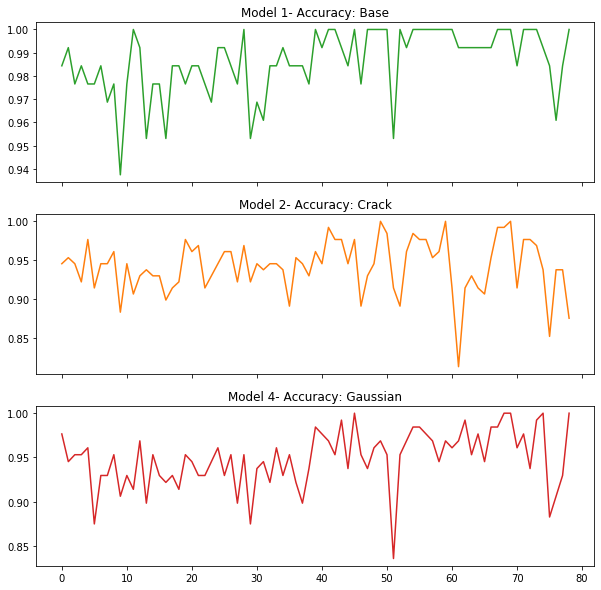

In [53]:
fig2, (ax1, ax2, ax4) = plt.subplots(3, figsize = (10,10))
ax1.plot(list(range(len(test_accuracy1))), test_accuracy1, 'tab:green')
ax1.set_title('Model 1- Accuracy: Base')
ax2.plot(list(range(len(test_accuracy2))), test_accuracy2, 'tab:orange')
ax2.set_title('Model 2- Accuracy: Crack')
ax4.plot(list(range(len(test_accuracy4))), test_accuracy4, 'tab:red')
ax4.set_title('Model 4- Accuracy: Gaussian')

for ax in fig2.get_axes():
    ax.label_outer()

## Visualizing MNIST dataset and Predicted Labels

/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


The model prediction were [7 7 8 6 6 5 4 7 9 4]
The actual classes were :[7 7 8 6 5 5 4 7 9 4]


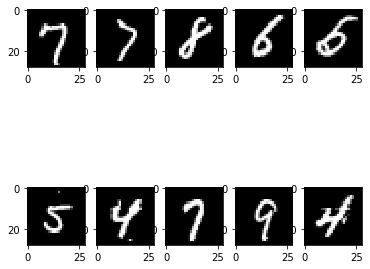

In [237]:
import numpy as np
import matplotlib.pyplot as plt

pred_label = []
true_label = []
plt.rcParams['figure.figsize'] = (6,6)
random_images = [int(i) for i in np.round(np.random.rand(10,1)* 10000)] 

for i in range(10):
    img_num = random_images[i]
    img = np.array(val[img_num][0])
   # print(val[img_num][0])
    plt.subplot(2,5,i+1)
    plt.imshow(img.reshape((28,28)), cmap='gray', interpolation='none')
    index = torch.tensor(img_num)
  # print(index)
  #  print(val[index])
    im, la = val[index]
    im = im.unsqueeze(0)
    #print(im.shape)
    output = model(im)
    _, prediction = torch.max(output.data, 1)
    pred_label.append(prediction)
    true_label.append(la)

print("The model prediction were " + str(np.array(pred_label)))
print("The actual classes were :" + str(np.array(true_label)))

## Visualizing MNIST Feature Map and Filters

/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


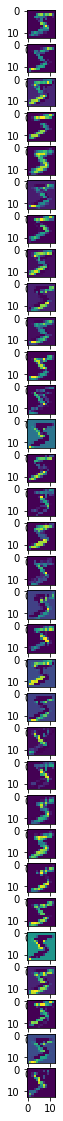

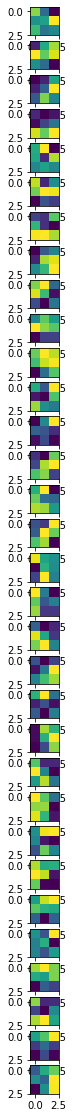

In [311]:
# Visualizing Feature Maps
#from torchvision.utils import make_grid

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model.layer1.register_forward_hook(get_activation('conv1'))
data2, _ = train[0]
data2.unsqueeze_(0)
output2 = model(data2)

act2 = activation['conv1'].squeeze()
fig, axarr2 = plt.subplots(act2.size(0))
fig.set_figheight(20)
fig.set_figwidth(20)
#plt.subplot(2,5,act.size(0))
for idx in range(act2.size(0)):
    axarr2[idx].imshow(act2[idx])
    
# Visualizing Filters layer
kernels2 = model.layer1[0].weight.detach()
fig, axarr2 = plt.subplots(kernels2.size(0))
fig.set_figheight(20)
fig.set_figwidth(20)
for idx in range(kernels2.size(0)):
   # print(kernels[idx].shape)
    axarr2[idx].imshow(kernels2[idx].squeeze())
    


## CIFAR100 DATASETS

In [31]:
stats = ((0.5074,0.4867,0.4411),(0.2011,0.1987,0.2025))
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32,padding=4,padding_mode="reflect"),
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(*stats)
])

train2 = thv.datasets.CIFAR100(' .. / data ', download=True , train=True, transform=train_transform)
val2 = thv.datasets.CIFAR100(' .. / data ', download=True , train=False,transform=test_transform)
print(train2.data.shape , len ( train2.targets ))
print(val2.data.shape , len ( val2.targets ))

train_loader2 = torch.utils.data.DataLoader(train2, batch_size=128, shuffle = True)
test_loader2 = torch.utils.data.DataLoader(val2, batch_size=128, shuffle = False)


Files already downloaded and verified
Files already downloaded and verified
(50000, 32, 32, 3) 50000
(10000, 32, 32, 3) 10000


## CNN FOR CIFAR100

In [165]:
class ConNet2(nn.Module):
    def __init__(self):
        super(ConNet2, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=5, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear( 64 * 5* 5, 1024)
        self.relu = nn.ReLU()
        

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.flatten(out)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.relu(out)
        return F.log_softmax(out)

In [174]:
model2 = ConNet2()

# Loss and optimizer
criterion2 = nn.CrossEntropyLoss()
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.0005)

In [175]:
from sklearn.metrics import f1_score, precision_score, recall_score

total_step2 = len(train_loader2)
loss_list2 = []
acc_list2 = []
num_epochs = 10
for epoch in range(num_epochs):
    for i, (images2, labels2) in enumerate(train_loader2):
        # Run the forward pass
        outputs = model2(images2)
        loss2 = criterion2(outputs, labels2)
        loss_list2.append(loss2.item())

        # Backprop and perform Adam optimisation
        optimizer2.zero_grad()
        loss2.backward()
        optimizer2.step()

        # Track the accuracy
        total2 = labels2.size(0)
        _, predicted2 = torch.max(outputs.data, 1)
        correct2 = (predicted2 == labels2).sum().item()
        acc_list2.append(correct2 / total2)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step2, loss2.item(),
                          (correct2 / total2) * 100))
            print('F1: {}  Precision: {}  Recall: {}'.format(f1_score(labels2, predicted2, average = "weighted"),precision_score(labels2, predicted2, average = "weighted"),recall_score(labels2, predicted2, average = "weighted")))
        #print(f1_score(y_true, y_pred.data.to('cpu')))

/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch [1/10], Step [100/391], Loss: 5.8883, Accuracy: 5.47%
F1: 0.03283747502497503  Precision: 0.031901041666666664  Recall: 0.0546875
Epoch [1/10], Step [200/391], Loss: 5.9881, Accuracy: 7.03%
F1: 0.053903431637806636  Precision: 0.060825892857142856  Recall: 0.0703125
Epoch [1/10], Step [300/391], Loss: 5.6098, Accuracy: 10.16%
F1: 0.06505681818181819  Precision: 0.07327938988095238  Recall: 0.1015625
Epoch [2/10], Step [100/391], Loss: 5.7267, Accuracy: 10.94%
F1: 0.07674851190476191  Precision: 0.06878004807692308  Recall: 0.109375
Epoch [2/10], Step [200/391], Loss: 5.5122, Accuracy: 14.06%
F1: 0.0935983721139971  Precision: 0.08850446428571429  Recall: 0.140625
Epoch [2/10], Step [300/391], Loss: 5.4077, Accuracy: 14.84%
F1: 0.09069940476190477  Precision: 0.0765625  Recall: 0.1484375
Epoch [3/10], Step [100/391], Loss: 5.4597, Accuracy: 14.06%
F1: 0.09836309523809525  Precision: 0.09123263888888888  Recall: 0.140625
Epoch [3/10], Step [200/391], Loss: 5.8172, Accuracy: 11.72%


## Visualizing CFAR100 dataset and Predicted Labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data t

The model prediction were [79 62 92 28 67  5 58 71 98 27]
The actual classes were :[ 6 61 92 22 41 69 81 57 11 27]


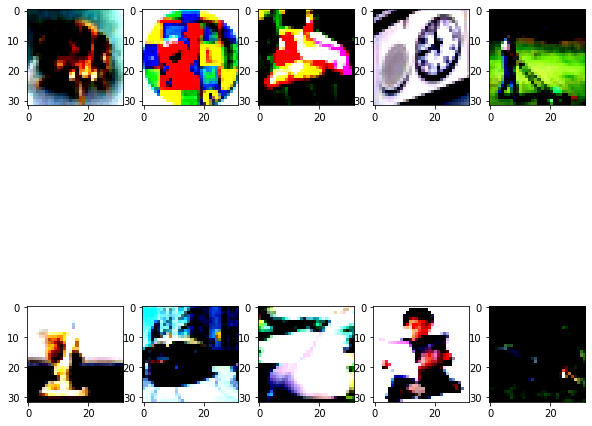

In [257]:
import numpy as np
import matplotlib.pyplot as plt

pred_label2 = []
true_label2 = []
plt.rcParams['figure.figsize'] = (10,10)
random_images2 = [int(i) for i in np.round(np.random.rand(10,1)* 10000)] 

for i in range(10):
    img_num2 = random_images2[i]
    img2 = np.array(val2[img_num2][0])
    img2 = img2.transpose(1,2,0)
    plt.subplot(2,5,i+1)
    plt.imshow(img2.reshape((32,32,3)), interpolation='none')
    index2 = torch.tensor(img_num2)

    im2, la2 = val2[index2]
    im2 = im2.unsqueeze(0)
    output2 = model2(im2)
    _, prediction2 = torch.max(output2.data, 1)
    pred_label2.append(prediction2)
    true_label2.append(la2)

print("The model prediction were " + str(np.array(pred_label2)))
print("The actual classes were :" + str(np.array(true_label2)))

## Visualizing Feature Maps and Filters for CFAR100

/Users/niloofar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data t

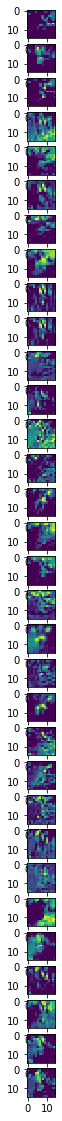

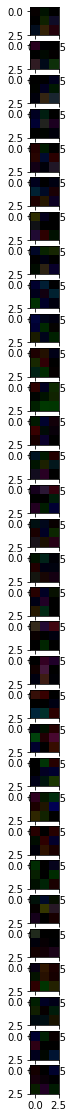

In [298]:
# Visualizing Feature Maps
from torchvision.utils import make_grid

activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

model2.layer1.register_forward_hook(get_activation('conv1'))
data, _ = train2[0]
data.unsqueeze_(0)
output = model2(data)

act = activation['conv1'].squeeze()
fig, axarr = plt.subplots(act.size(0))
fig.set_figheight(20)
fig.set_figwidth(20)
#plt.subplot(2,5,act.size(0))
for idx in range(act.size(0)):
    axarr[idx].imshow(act[idx])
    

# Visualizing Filters layer
kernels = model2.layer1[0].weight.detach()
fig, axarr = plt.subplots(kernels.size(0))
fig.set_figheight(20)
fig.set_figwidth(20)
for idx in range(kernels.size(0)):
   # print(kernels[idx].shape)
    axarr[idx].imshow(kernels[idx].squeeze())
    
    